In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
df = pd.read_csv('ML_Server/data/malicious_phish_features.csv')  # используем прямые слеши

# Гистограмма распределения классов
plt.figure(figsize=(7,4))
sns.countplot(x='class', data=df, palette='Set2')  # используем 'class' вместо 'type'
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('class_distribution.svg')  # SVG для LaTeX
plt.show()

# Дополнительная информация о датасете
print("\nИнформация о датасете:")
print(f"Всего URL: {len(df)}")
print(f"Benign URL: {len(df[df['class'] == 0])}")
print(f"Malicious URL: {len(df[df['class'] == 1])}")

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(df.isnull().sum())

MemoryError: Unable to allocate 150. MiB for an array with shape (3, 6568183) and data type float64

C:\Users\User\AppData\Local\Temp\ipykernel_23008\2562942543.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')  # используем 'class' вместо 'type'


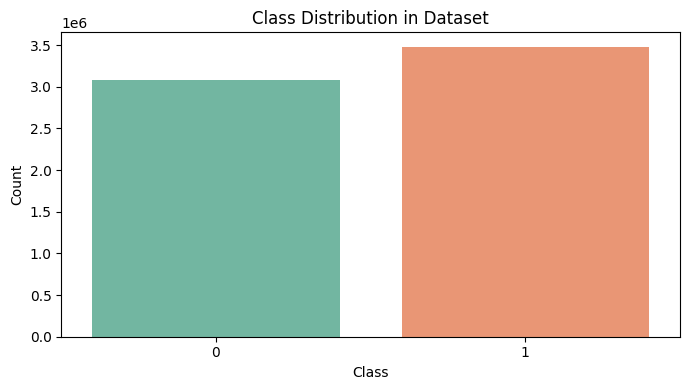


Информация о датасете:
Всего URL: 6568183
Benign URL: 3087717
Malicious URL: 3480466

Пропущенные значения:
url      0
class    0
dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
df = pd.read_csv('ML_Server/data/malicious_phish_cleaned.csv')  # используем прямые слеши

# Гистограмма распределения классов
plt.figure(figsize=(7,4))
sns.countplot(x='class', data=df, palette='Set2')  # используем 'class' вместо 'type'
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('class_distribution.svg')  # SVG для LaTeX
plt.show()

# Дополнительная информация о датасете
print("\nИнформация о датасете:")
print(f"Всего URL: {len(df)}")
print(f"Benign URL: {len(df[df['class'] == 0])}")
print(f"Malicious URL: {len(df[df['class'] == 1])}")

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(df.isnull().sum())

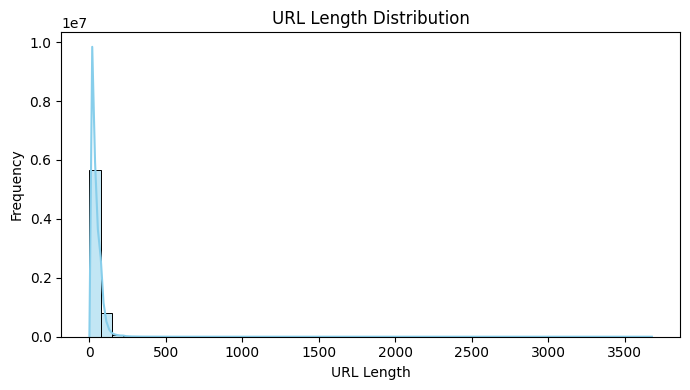

In [4]:
df['url_length'] = df['url'].apply(len)
plt.figure(figsize=(7,4))
sns.histplot(df['url_length'], bins=50, kde=True, color='skyblue')
plt.title('URL Length Distribution')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('url_length_distribution.svg')
plt.show()

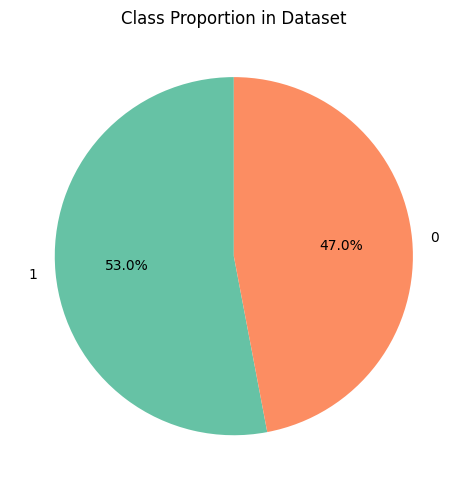

In [6]:
plt.figure(figsize=(5,5))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.ylabel('')
plt.title('Class Proportion in Dataset')
plt.tight_layout()
plt.savefig('class_pie_chart_cleaned.svg')
plt.show()

In [7]:
print(df.columns.tolist())

['url', 'class', 'url_length']


In [8]:
import re

# Признак: есть ли https
df['has_https'] = df['url'].apply(lambda x: 1 if x.startswith('https://') else 0)

# Признак: есть ли IP-адрес в URL
def contains_ip(url):
    # IPv4
    ip_pattern = r'((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)'
    return 1 if re.search(ip_pattern, url) else 0

df['has_ip'] = df['url'].apply(contains_ip)

C:\Users\User\AppData\Local\Temp\ipykernel_23008\1165265491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


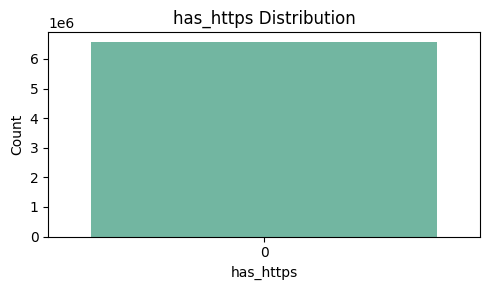

C:\Users\User\AppData\Local\Temp\ipykernel_23008\1165265491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


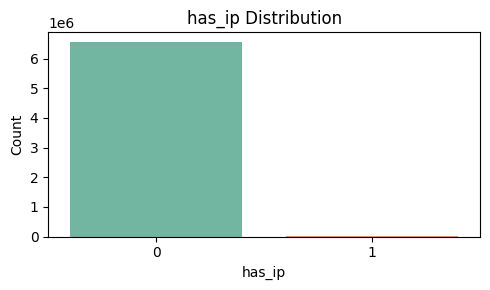

In [9]:
for feature in ['has_https', 'has_ip']:
    plt.figure(figsize=(5,3))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f'{feature}_distribution.svg')
    plt.show()

In [29]:
import pandas as pd

# Пример данных (замени на свои значения)
results = {
    'Model': ['Random Forest', 'Logistic Regression', 'Linear SVM', 'KNN'],
    'Accuracy': [0.936, 0.836, 0.839, 0.933],
    'Precision': [0.898, 0.758, 0.766, 0.913],
    'Recall': [0.918, 0.766, 0.763, 0.889],
    'F1-score': [0.908, 0.762, 0.764, 0.901],
    'ROC-AUC': [0.932, 0.819, 0.82, 0.922],
    'Train Time (s)': [29.12, 0.57, 1.82, 40.67]
}
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC,Train Time (s)
0,Random Forest,0.936,0.898,0.918,0.908,0.932,29.12
1,Logistic Regression,0.836,0.758,0.766,0.762,0.819,0.57
2,Linear SVM,0.839,0.766,0.763,0.764,0.820,1.82
3,KNN,0.933,0.913,0.889,0.901,0.922,40.67


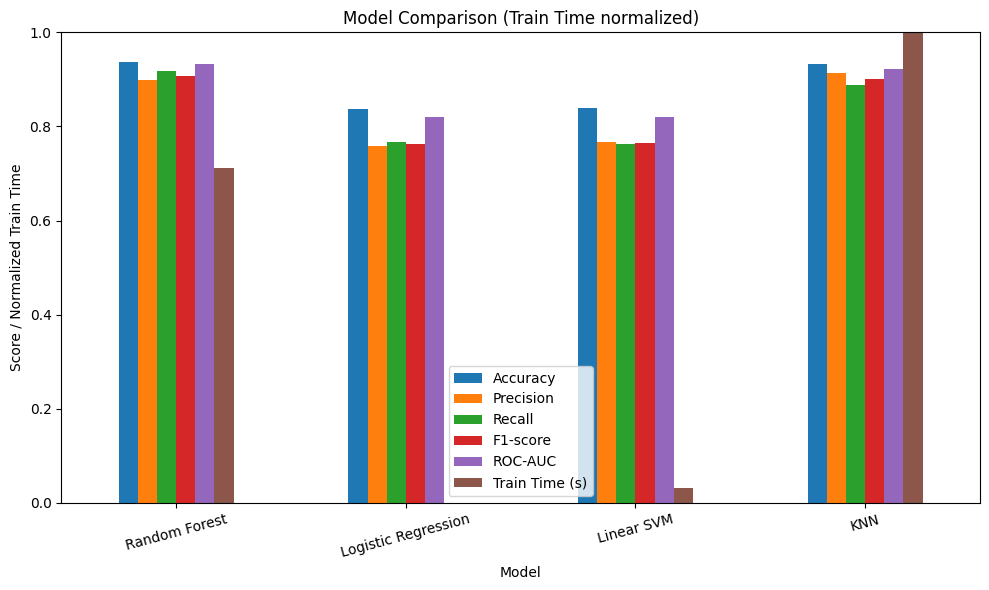

In [41]:
import matplotlib.pyplot as plt

# Копируем DataFrame, чтобы не менять исходный
df_plot_norm = df_results.copy()

# Нормализация столбца Train Time (s) в диапазон [0, 1]
tt = df_plot_norm['Train Time (s)']
df_plot_norm['Train Time (s)'] = (tt - tt.min()) / (tt.max() - tt.min())

metrics = ['Accuracy', 'Precision', "Recall", 'F1-score', 'ROC-AUC', 'Train Time (s)']
df_plot_norm = df_plot_norm.set_index('Model')[metrics]

df_plot_norm.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison (Train Time normalized)')
plt.ylabel('Score / Normalized Train Time')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('model_comparison_bar_normalized.svg')
plt.show()